## Importation des packages

In [1]:
pip install graphviz


  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd 
import math
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn import model_selection
from sklearn.preprocessing import scale
import operator
import sklearn.metrics as metrics
import graphviz 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

## Chargement des données

In [3]:
### Données de la conso moyenne par jour et tmoy par jour
enedis_IDF=pd.read_csv("Donnees/data_one_hot_encoded_like_xgboost_6kva_IDF.csv",sep=",")
enedis_HDF=pd.read_csv("Donnees/data_one_hot_encoded_like_xgboost_6kva_HDF.csv",sep=",")
enedis_PACA=pd.read_csv("Donnees/data_one_hot_encoded_like_xgboost_6kva_PACA.csv",sep=",")

### On enlève les valeurs manquantes

enedis_IDF.dropna(inplace=True)
enedis_PACA.dropna(inplace=True)
enedis_HDF.dropna(inplace=True)

In [20]:
enedis_PACA

,Horodate,tmoy,conso_totale_moyenne,hour,dayofweek,month,dayofyear,dayofmonth,minute,indice,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2022-12-31 23:30:00,11.69,238.243608,23,5,12,365,31,30,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2022-12-31 23:00:00,11.69,247.714720,23,5,12,365,31,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2022-12-31 22:30:00,11.69,259.513479,22,5,12,365,31,30,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2022-12-31 22:00:00,11.69,270.009868,22,5,12,365,31,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2022-12-31 21:30:00,11.69,284.872089,21,5,12,365,31,30,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2021-01-01 02:00:00,5.32,338.888442,2,4,1,1,1,0,35035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35036,2021-01-01 01:30:00,5.32,344.587789,1,4,1,1,1,30,35036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35037,2021-01-01 01:00:00,5.32,353.783601,1,4,1,1,1,0,35037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35038,2021-01-01 00:30:00,5.32,365.971955,0,4,1,1,1,30,35038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
list(enedis_IDF.columns)

['Horodate',
 'tmoy',
 'conso_totale_moyenne',
 'hour',
 'dayofweek',
 'month',
 'dayofyear',
 'dayofmonth',
 'minute',
 'indice',
 'heure_1',
 'heure_2',
 'heure_3',
 'heure_4',
 'heure_5',
 'heure_6',
 'heure_7',
 'heure_8',
 'heure_9',
 'heure_10',
 'heure_11',
 'heure_12',
 'heure_13',
 'heure_14',
 'heure_15',
 'heure_16',
 'heure_17',
 'heure_18',
 'heure_19',
 'heure_20',
 'heure_21',
 'heure_22',
 'heure_23',
 'heure_24',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'day_7',
 'day_8',
 'day_9',
 'day_10',
 'day_11',
 'day_12',
 'day_13',
 'day_14',
 'day_15',
 'day_16',
 'day_17',
 'day_18',
 'day_19',
 'day_20',
 'day_21',
 'day_22',
 'day_23',
 'day_24',
 'day_25',
 'day_26',
 'day_27',
 'day_28',
 'day_29',
 'day_30',
 'day_31',
 'minute_1',
 'minute_2',
 'dayweek_1',
 'dayweek_2',
 'dayweek_3',
 'dayweek_4',
 'dayweek_5',
 'dayweek_6',
 'dayweek_7',
 'dayyear_1',
 'dayyear_2',
 'dayyear_3',
 'dayyear_4',
 'dayyear_5',
 'dayyear_6',
 'dayyear_7',
 'dayyear_8'

In [11]:
def decoupedata(bdd_region):
    X = bdd_region.drop(["conso_totale_moyenne","Horodate"],axis=1)
    Y = bdd_region[["conso_totale_moyenne"]]
    
    # On coupe les echantillons en 
    #Apprentissage : 2021 Test : 2022
    

    split_date = "2022-01-01 00:00:00"
    df_train = bdd_region.loc[bdd_region["Horodate"]< split_date].copy()
    df_test = bdd_region.loc[bdd_region["Horodate"]> split_date].copy()

    

    X_train = df_train[["tmoy","hour","dayofweek","dayofyear","month","dayofmonth","minute"]]
    Y_train = df_train[["conso_totale_moyenne"]]

    X_test = df_test[["tmoy","hour","dayofweek","dayofyear","month","dayofmonth","minute"]]
    Y_test = df_test[["conso_totale_moyenne"]]
    ##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    return (X,Y, X_train,Y_train,X_test, Y_test)

In [12]:
### Creation des sous-echantillons :
X_IDF_30,Y_IDF_30 , X_train_IDF_30,  Y_train_IDF_30,X_test_IDF_30, Y_test_IDF_30 =decoupedata(enedis_IDF)
X_HDF_30,Y_HDF_30 , X_train_HDF_30, Y_train_HDF_30, X_test_HDF_30, Y_test_HDF_30 =decoupedata(enedis_HDF)

In [13]:
X_train_HDF_30

,tmoy,hour,dayofweek,dayofyear,month,dayofmonth,minute
0,1.64,0,4,1,1,1,0
1,1.64,0,4,1,1,1,30
2,1.64,1,4,1,1,1,0
3,1.64,1,4,1,1,1,30
4,1.64,2,4,1,1,1,0
...,...,...,...,...,...,...,...
17515,11.67,21,4,365,12,31,30
17516,11.67,22,4,365,12,31,0
17517,11.67,22,4,365,12,31,30
17518,11.67,23,4,365,12,31,0


In [14]:
enedis_HDF

,Horodate,tmoy,conso_totale_moyenne,hour,dayofweek,month,dayofyear,dayofmonth,minute
0,2021-01-01 00:00:00,1.64,384.287210,0,4,1,1,1,0
1,2021-01-01 00:30:00,1.64,372.953781,0,4,1,1,1,30
2,2021-01-01 01:00:00,1.64,360.441259,1,4,1,1,1,0
3,2021-01-01 01:30:00,1.64,350.931623,1,4,1,1,1,30
4,2021-01-01 02:00:00,1.64,345.284677,2,4,1,1,1,0
...,...,...,...,...,...,...,...,...,...
35035,2022-12-31 21:30:00,14.11,348.130498,21,5,12,365,31,30
35036,2022-12-31 22:00:00,14.11,329.996946,22,5,12,365,31,0
35037,2022-12-31 22:30:00,14.11,316.995544,22,5,12,365,31,30
35038,2022-12-31 23:00:00,14.11,302.512759,23,5,12,365,31,0


In [15]:
X_PACA_30_,Y_PACA_30,X_train_PACA_30,Y_train_PACA_30,X_test_PACA_30,Y_test_PACA_30=decoupedata(enedis_PACA)

Best: 0.641493 using {'max_depth': 14}
-0.171384 (0.625485) with: {'max_depth': 2}
0.227766 (0.477946) with: {'max_depth': 3}
0.231305 (0.448758) with: {'max_depth': 4}
0.325997 (0.391238) with: {'max_depth': 5}
0.412451 (0.338551) with: {'max_depth': 6}
0.457215 (0.353030) with: {'max_depth': 7}
0.498919 (0.316872) with: {'max_depth': 8}
0.546073 (0.279547) with: {'max_depth': 9}
0.574462 (0.274908) with: {'max_depth': 10}
0.623578 (0.246571) with: {'max_depth': 11}
0.618960 (0.262357) with: {'max_depth': 12}
0.634584 (0.234876) with: {'max_depth': 13}
0.641493 (0.236002) with: {'max_depth': 14}


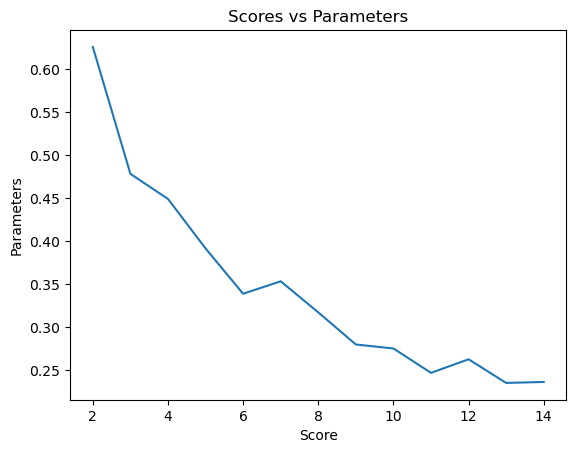

In [16]:
from sklearn.model_selection import GridSearchCV
param_liste=[i for i in range(2,15)]
param_grid = {'max_depth':param_liste}
grid= GridSearchCV(DecisionTreeRegressor(random_state=0),cv=10,param_grid=param_grid)



grid_result = grid.fit(X_train_HDF_30, Y_train_HDF_30)

# Summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Plot scores

#plt.errorbar(means, stds, fmt='o')
plt.plot(param_liste,stds)
plt.title("Scores vs Parameters")
plt.xlabel('Score')
plt.ylabel('Parameters')
plt.show()

In [17]:
def caract_arbre(X_train, Y_train,X_test, Y_test):
    param_grid = {'max_depth':[i for i in range(2,10)]}
    predictor= GridSearchCV(DecisionTreeRegressor(random_state=0),cv=10,param_grid=param_grid)
    predictor.fit(X_train,Y_train)
    print('Paramètre sélectionné:',predictor.best_params_)
    print('Score d\'apprentissage: ',predictor.score(X_train,Y_train))
    print('Score de test: ',predictor.score(X_test,Y_test))
    return(predictor.best_params_["max_depth"])

In [38]:
def genere_arbre(X_train, Y_train,X_test, Y_test, maxdepth=4):
 #   max_depth_arbre=caract_arbre(X_train, Y_train,X_test, Y_test)
    feature_n=list(X_train.columns)
    #instanciation
    model_DT = tree.DecisionTreeRegressor(random_state=0,ccp_alpha=0.015,max_depth=maxdepth)
    #training
    model_DT.fit(X_train,Y_train)
    prediction = model_DT.predict(X_test)
    Y_test["prevision"]=prediction
    
    #calcule de précision
    print('Parametre select : ',maxdepth)    
    # Calculate the mean square errors
    MSE = mean_squared_error(y_true=Y_test["conso_totale_moyenne"],y_pred=Y_test["prevision"])
    MSE_combine = "le MSE est de " + str(MSE)
    print(MSE_combine)
    
    MAE = mean_absolute_error(y_true=Y_test["conso_totale_moyenne"],y_pred=Y_test["prevision"])
    MAE_combine = "le MAE est de " + str(MAE)
    print(MAE_combine)
    
    RMSE = math.sqrt(MSE)
    RMSE_combine = "le RMSE est de " + str(RMSE)
    print(RMSE_combine)
    # Calculate the R2
    r2 = r2_score(y_true=Y_test["conso_totale_moyenne"],y_pred=Y_test["prevision"])
    r2_combine = "le R2 est de " + str(r2)
    print (r2_combine)
    
    # Affichage de l'arbre
    plot_tree(model_DT,feature_names=feature_n,filled=True)
    plt.show()
    return(model_DT)

In [39]:
def extract_arbre(arbre, X_train,region):
    features=list(X_train_IDF_30.columns)
    # Créer un graphique du modèle
    dot_data = tree.export_graphviz(arbre, out_file=None,feature_names=features,
                                    filled=True, rounded=True,  special_characters=True) 
    graph = graphviz.Source(dot_data) 

    graph.render("arbre"+region)

### Hauts-de-france 

In [40]:
caract_arbre(X_train_HDF_30,  Y_train_HDF_30,X_test_HDF_30,Y_test_HDF_30)


Paramètre sélectionné: {'max_depth': 9}
Score d'apprentissage:  0.955477511646469


ValueError: y_true and y_pred have different number of output (2!=1)

In [ ]:
arbre_HDF=genere_arbre(X_train_HDF_30,  Y_train_HDF_30,X_test_HDF_30,Y_test_HDF_30)


In [41]:
extract_arbre(arbre_HDF,X_train_HDF_30,"HDF")

Text(0.5, 1.0, "Prédiction de la consommation pour l'année 2022")

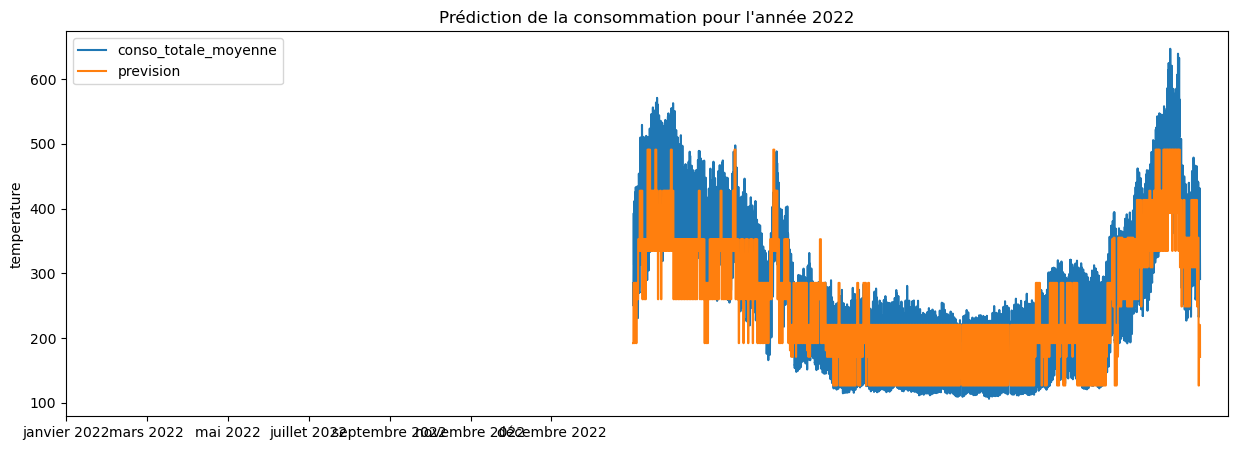

In [43]:
Y_test_HDF_30[['conso_totale_moyenne','prevision']].plot(figsize=(15, 5))
plt.ylabel('Consommation moyenne ')
plt.ylabel('temperature')
t2=[0,2500,5000,7500,10000,12500,15000]
plt.xticks(t2,["janvier 2022","mars 2022","mai 2022","juillet 2022","septembre 2022","novembre 2022","décembre 2022"])
plt.title("Prédiction de la consommation pour l'année 2022")

In [ ]:
X_test_HDF

In [26]:
arbre_HDF.get_depth()
## 47

4

In [ ]:
## MSE 1313 avec 47 profondeur

### Île de France

In [27]:
caract_arbre(X_train_IDF_30,  Y_train_IDF_30,X_test_IDF_30,Y_test_IDF_30)


Paramètre sélectionné: {'max_depth': 9}
Score d'apprentissage:  0.9540895057410111
Score de test:  0.8842856436306501


9

Parametre select :  4
le MSE est de 1324.3001327959596
le MAE est de 27.427482193537042
le R2 est de 0.8194270110767609


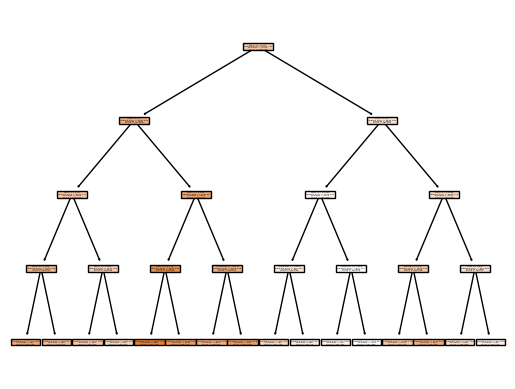

In [28]:
arbreIDF=genere_arbre(X_train_IDF_30,  Y_train_IDF_30,X_test_IDF_30,Y_test_IDF_30)

In [37]:
arbreIDF.get_depth()

## 44 avec MSE 652, R2 0.9

44

In [30]:
arbreIDF.feature_importances_

array([0.76659383, 0.21512078, 0.        , 0.01364791, 0.00463747,
       0.        , 0.        ])

In [31]:
np.array(np.array(list(X_train_IDF_30.columns)),arbreIDF.feature_importances_)

TypeError: Cannot construct a dtype from an array

In [32]:
extract_arbre(arbreIDF,X_train_IDF_30,"IDF")

Text(0.5, 1.0, "Prédiction de la consommation pour l'année 2022")

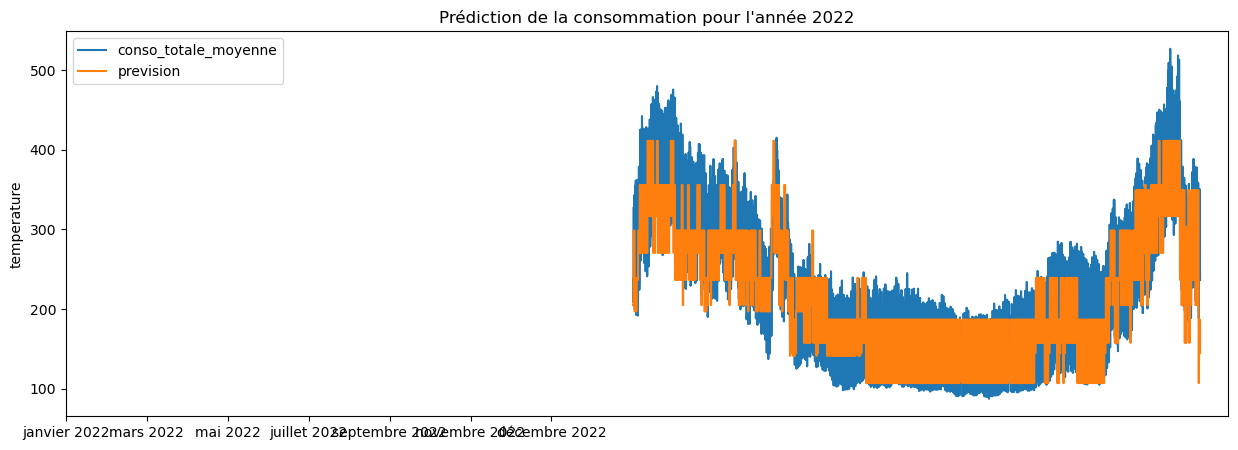

In [33]:
Y_test_IDF_30[['conso_totale_moyenne','prevision']].plot(figsize=(15, 5))
plt.ylabel('Consommation moyenne ')
plt.ylabel('temperature')
t2=[0,2500,5000,7500,10000,12500,15000]
plt.xticks(t2,["janvier 2022","mars 2022","mai 2022","juillet 2022","septembre 2022","novembre 2022","décembre 2022"])
plt.title("Prédiction de la consommation pour l'année 2022")

### PACA

In [34]:
caract_arbre(X_train_PACA_30,  Y_train_PACA_30,X_test_PACA_30,Y_test_PACA_30)

Paramètre sélectionné: {'max_depth': 9}
Score d'apprentissage:  0.9440666065661593
Score de test:  0.8374622017630518


9

Parametre select :  4
le MSE est de 1767.787447511166
le MAE est de 33.28203649915088
le R2 est de 0.7745341223842188


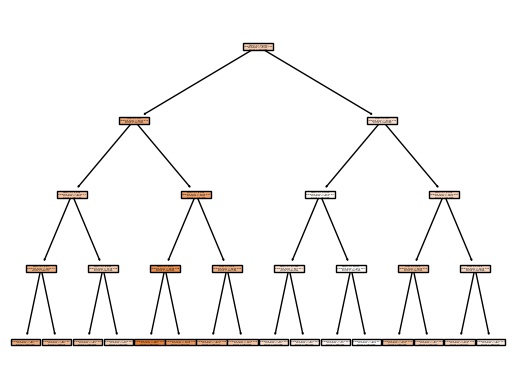

In [35]:
arbre_PACA=genere_arbre(X_train_PACA_30,  Y_train_PACA_30,X_test_PACA_30,Y_test_PACA_30)

In [36]:
extract_arbre(arbre_PACA,X_train_PACA_30,"PACA")

Text(0.5, 1.0, "Prédiction de la consommation pour l'année 2022")

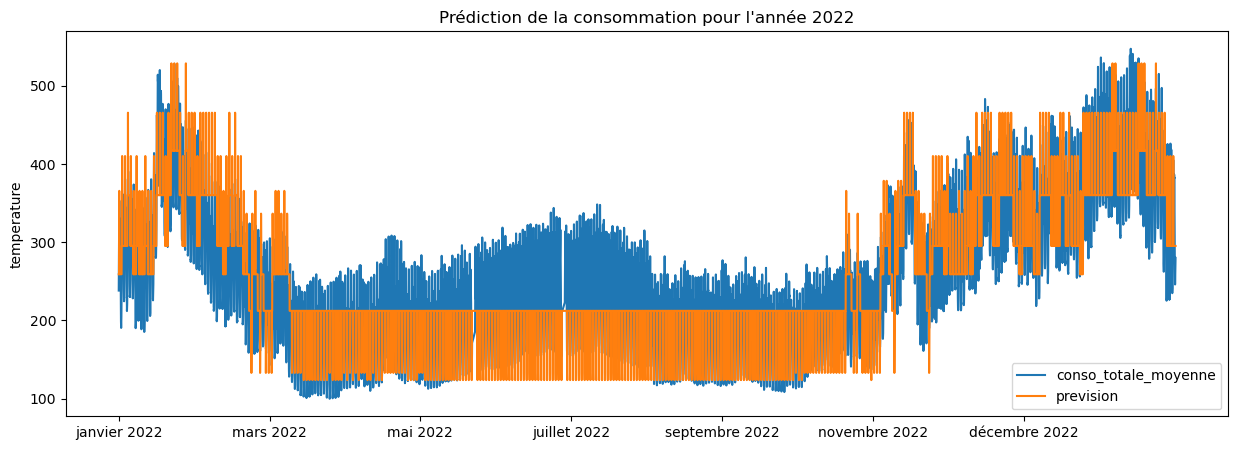

In [50]:
Y_test_PACA_30[['conso_totale_moyenne','prevision']].plot(figsize=(15, 5))
plt.ylabel('Consommation moyenne ')
plt.ylabel('temperature')
t2=[0,2500,5000,7500,10000,12500,15000]
plt.xticks(t2,["janvier 2022","mars 2022","mai 2022","juillet 2022","septembre 2022","novembre 2022","décembre 2022"])
plt.title("Prédiction de la consommation pour l'année 2022")

On remarque ici que le modèle ne predit pas correctement les données lors du pic du milieu etre mai et août. Cependant il predit relativement bien les variations de début janvier et de novembre a décembre. Un arbre de plus grande taille pourrait améliorer cela. Cependant ça ne devient plus lisible et l'interprétation en devient difficile.

In [2]:
clf = DecisionTreeRegressor(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_IDF_30, Y_train_IDF_30)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

NameError: name 'DecisionTreeRegressor' is not defined

In [1]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_IDF_30, Y_train_IDF_30)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


NameError: name 'ccp_alphas' is not defined

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
train_scores = [clf.score(X_train_IDF_30, Y_train_IDF_30) for clf in clfs]
test_scores = [clf.score(X_test_, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()